In [2]:
# import libraries
from eodag import EODataAccessGateway
from eodag.plugins.crunch.filter_property import FilterProperty
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
from eodag import setup_logging
setup_logging(verbose=2)

import matplotlib.image as mpimg

### Load Tiles outlines

In [3]:
# load tile outlines
outline = gpd.read_file("qgis_files/sen2_tiles/tiles_outline.shp")
bretagne = gpd.read_file("qgis_files/admin/bretagne.gpkg")
query_outline = gpd.read_file("qgis_files/admin/query_shape.shp")
query_wkt = query_outline.geometry.to_wkt()[0]

# simplify geometry
#bretagne["geometry"] = bretagne["geometry"].simplify


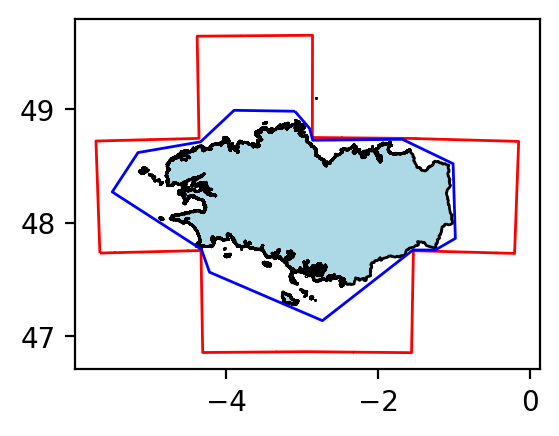

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1,figsize=(3,3), dpi=200)

bretagne.plot(ax=ax,color='lightblue', edgecolor='black')
outline.plot(ax=ax,facecolor="none",edgecolor="red",markersize=0.2)
query_outline.plot(ax=ax,facecolor="none",edgecolor="blue",markersize=0.2)
fig.show()

### Query EODAG API

In [5]:
# API core acess gateway
dag = EODataAccessGateway()

2021-11-24 17:39:20,473-15s eodag.config                     [INFO    ] Loading user configuration from: /home/simon/.config/eodag/eodag.yml
2021-11-24 17:39:21,037-15s eodag.core                       [INFO    ] Locations configuration loaded from /home/simon/.config/eodag/locations.yml


In [13]:
dag.available_providers("S2_MSI_L2A_MAJA")

['theia']

In [14]:
# Query for images
search_results, total_count = dag.search(
    productType='S2_MSI_L2A_MAJA',
    #geom={'lonmin': 1, 'latmin': 43.5, 'lonmax': 2, 'latmax': 44}, # accepts WKT polygons, shapely.geometry, ...
    geom=query_wkt,
    start='2018-04-01',
    end='2018-09-30'
)

# filter images by Cloud Cover
filtered_products = search_results.crunch(FilterProperty({"cloudCover": 5, "operator": "lt"}))

# print info
print("Total No. of images for S2A:", len(search_results))
print("Total No. of images for S2A, max CC 5%:",len(filtered_products))

2021-11-24 17:50:18,426-15s eodag.core                       [WARNING ] Product type 'S2_MSI_L2A_MAJA' is not available with provider 'onda'. Searching it on provider 'theia' instead.
2021-11-24 17:50:18,428-15s eodag.plugins.search.qssearch    [INFO    ] Sending count request: https://theia.cnes.fr/atdistrib/resto2/api/collections/SENTINEL2/search.json?startDate=2018-04-01&completionDate=2018-09-30&geometry=POLYGON ((-3.0975 48.9833, -2.9042 48.8323, -2.8620 48.7277, -1.6815 48.7364, -1.0120 48.5212, -0.9823 47.8634, -1.2470 47.7610, -1.5408 47.7610, -2.7349 47.1388, -4.2226 47.5658, -4.3287 47.7664, -5.5052 48.2729, -5.1651 48.6192, -4.3400 48.7141, -3.8989 48.9915, -3.0975 48.9833))&processingLevel=LEVEL2A&maxRecords=1&page=1
2021-11-24 17:50:19,557-15s eodag.plugins.search.qssearch    [INFO    ] Sending search request: https://theia.cnes.fr/atdistrib/resto2/api/collections/SENTINEL2/search.json?startDate=2018-04-01&completionDate=2018-09-30&geometry=POLYGON ((-3.0975 48.9833, -2.90

Total No. of images for S2A: 20
Total No. of images for S2A, max CC 5%: 10


### Download QuickLooks

In [15]:
for i in filtered_products:
    print(i)

EOProduct(id=SENTINEL2A_20180927-112330-164_L2A_T30UVU_D, provider=theia)
EOProduct(id=SENTINEL2A_20180927-112330-164_L2A_T30TWT_D, provider=theia)
EOProduct(id=SENTINEL2A_20180927-112330-164_L2A_T30UVV_D, provider=theia)
EOProduct(id=SENTINEL2A_20180927-112330-164_L2A_T30UUU_D, provider=theia)
EOProduct(id=SENTINEL2A_20180927-112330-164_L2A_T30UWV_D, provider=theia)
EOProduct(id=SENTINEL2A_20180927-112330-164_L2A_T30TVT_D, provider=theia)
EOProduct(id=SENTINEL2A_20180927-112330-164_L2A_T30UWU_D, provider=theia)
EOProduct(id=SENTINEL2B_20180926-110028-459_L2A_T30UXV_D, provider=theia)
EOProduct(id=SENTINEL2B_20180926-110028-459_L2A_T30UXU_D, provider=theia)
EOProduct(id=SENTINEL2B_20180926-110028-459_L2A_T30TWT_D, provider=theia)


In [7]:
"""
dag.serialize(filtered_products,filename="tmp/saved_search.json")
"""

'\ndag.serialize(filtered_products,filename="tmp/saved_search.json")\n'

In [8]:
"""
deserialized_and_registered = dag.deserialize_and_register("tmp/saved_search.json")
quicklook_path = deserialized_and_registered[0].get_quicklook(base_dir="")
"""

'\ndeserialized_and_registered = dag.deserialize_and_register("tmp/saved_search.json")\nquicklook_path = deserialized_and_registered[0].get_quicklook(base_dir="")\n'

In [9]:
"""
search_results = dag.deserialize_and_register(filtered_products)

fig = plt.figure(figsize=(10, 8))
for i, product in enumerate(filtered_products, start=1):
    print(product)

    # This line takes care of downloading the quicklook
    quicklook_path = product.get_quicklook()

    # Plot the quicklook
    img = mpimg.imread(quicklook_path)
    ax = fig.add_subplot(3, 4, i)
    ax.set_title(i - 1)
    plt.imshow(img)
plt.tight_layout()
"""

'\nsearch_results = dag.deserialize_and_register(filtered_products)\n\nfig = plt.figure(figsize=(10, 8))\nfor i, product in enumerate(filtered_products, start=1):\n    print(product)\n\n    # This line takes care of downloading the quicklook\n    quicklook_path = product.get_quicklook()\n\n    # Plot the quicklook\n    img = mpimg.imread(quicklook_path)\n    ax = fig.add_subplot(3, 4, i)\n    ax.set_title(i - 1)\n    plt.imshow(img)\nplt.tight_layout()\n'

### Download Imagery

In [10]:
# check which ones are online
#[p.properties["storageStatus"] for p in filtered_products]

In [11]:
# filter for online products
online_search_results = search_results.crunch(FilterProperty(dict(storageStatus="ONLINE")))
#[p.properties["storageStatus"] for p in online_search_results]

2021-11-17 22:54:16,111-15s eodag.plugins.crunch.filter_property [INFO    ] Finished filtering products. 0 resulting products


In [12]:
# download products
paths = dag.download_all(filtered_products)

2021-11-17 22:54:16,118-15s eodag.core                       [INFO    ] Downloading 1 products


Downloaded products:   0%|          | 0/1 [00:00<?, ?product/s]

0.00B [00:00, ?B/s]

2021-11-17 22:54:16,193-15s eodag.plugins.download.base      [INFO    ] Download url: https://catalogue.onda-dias.eu/dias-catalogue/Products(3ca89ab3-9ef0-4575-8ae3-98d1cbe4e287)/$value
2021-11-17 22:54:16,706-15s eodag.plugins.download.base      [INFO    ] S2A_MSIL2A_20180507T110621_N0207_R137_T30UUU_20180507T131836.SAFE(initially OFFLINE) requested, returned: {"@odata.context":"$metadata#Ens.Order","Id":"3ca89ab3-9ef0-4575-8ae3-98d1cbe4e287","Status":"RUNNING","StatusMessage":"The order is in progress","EstimatedTime":"2021-11-17T22:04:16.565Z"}
2021-11-17 22:54:16,707-15s eodag.plugins.download.base      [INFO    ] [Retry #1, 0/1 D/L] Waiting 119s until next download try (retry every 2' for 20')


0.00B [00:00, ?B/s]

2021-11-17 22:56:16,840-15s eodag.plugins.download.base      [INFO    ] Download url: https://catalogue.onda-dias.eu/dias-catalogue/Products(3ca89ab3-9ef0-4575-8ae3-98d1cbe4e287)/$value
2021-11-17 22:56:17,102-15s eodag.plugins.download.base      [INFO    ] S2A_MSIL2A_20180507T110621_N0207_R137_T30UUU_20180507T131836.SAFE(initially OFFLINE) requested, returned: {"@odata.context":"$metadata#Ens.Order","Id":"3ca89ab3-9ef0-4575-8ae3-98d1cbe4e287","Status":"RUNNING","StatusMessage":"The order is in progress","EstimatedTime":"2021-11-17T22:04:16.498Z"}
2021-11-17 22:56:17,103-15s eodag.plugins.download.base      [INFO    ] [Retry #2, 0/1 D/L] Waiting 119s until next download try (retry every 2' for 20')


0.00B [00:00, ?B/s]

2021-11-17 22:58:17,219-15s eodag.plugins.download.base      [INFO    ] Download url: https://catalogue.onda-dias.eu/dias-catalogue/Products(3ca89ab3-9ef0-4575-8ae3-98d1cbe4e287)/$value
2021-11-17 22:58:17,485-15s eodag.plugins.download.base      [INFO    ] S2A_MSIL2A_20180507T110621_N0207_R137_T30UUU_20180507T131836.SAFE(initially OFFLINE) requested, returned: {"@odata.context":"$metadata#Ens.Order","Id":"3ca89ab3-9ef0-4575-8ae3-98d1cbe4e287","Status":"RUNNING","StatusMessage":"The order is in progress","EstimatedTime":"2021-11-17T22:04:16.498Z"}
2021-11-17 22:58:17,486-15s eodag.plugins.download.base      [INFO    ] [Retry #3, 0/1 D/L] Waiting 119s until next download try (retry every 2' for 20')


0.00B [00:00, ?B/s]

2021-11-17 23:00:17,617-15s eodag.plugins.download.base      [INFO    ] Download url: https://catalogue.onda-dias.eu/dias-catalogue/Products(3ca89ab3-9ef0-4575-8ae3-98d1cbe4e287)/$value
2021-11-17 23:00:17,919-15s eodag.plugins.download.base      [INFO    ] S2A_MSIL2A_20180507T110621_N0207_R137_T30UUU_20180507T131836.SAFE(initially OFFLINE) requested, returned: {"@odata.context":"$metadata#Ens.Order","Id":"3ca89ab3-9ef0-4575-8ae3-98d1cbe4e287","Status":"RUNNING","StatusMessage":"The order is in progress","EstimatedTime":"2021-11-17T22:04:16.498Z"}
2021-11-17 23:00:17,921-15s eodag.plugins.download.base      [INFO    ] [Retry #4, 0/1 D/L] Waiting 119s until next download try (retry every 2' for 20')


0.00B [00:00, ?B/s]

2021-11-17 23:02:18,019-15s eodag.plugins.download.base      [INFO    ] Download url: https://catalogue.onda-dias.eu/dias-catalogue/Products(3ca89ab3-9ef0-4575-8ae3-98d1cbe4e287)/$value
2021-11-17 23:02:18,290-15s eodag.plugins.download.base      [INFO    ] S2A_MSIL2A_20180507T110621_N0207_R137_T30UUU_20180507T131836.SAFE(initially OFFLINE) requested, returned: {"@odata.context":"$metadata#Ens.Order","Id":"3ca89ab3-9ef0-4575-8ae3-98d1cbe4e287","Status":"RUNNING","StatusMessage":"The order is in progress","EstimatedTime":"2021-11-17T22:04:16.498Z"}
2021-11-17 23:02:18,291-15s eodag.plugins.download.base      [INFO    ] [Retry #5, 0/1 D/L] Waiting 119s until next download try (retry every 2' for 20')


0.00B [00:00, ?B/s]

2021-11-17 23:04:18,442-15s eodag.plugins.download.base      [INFO    ] Download url: https://catalogue.onda-dias.eu/dias-catalogue/Products(3ca89ab3-9ef0-4575-8ae3-98d1cbe4e287)/$value
2021-11-17 23:04:18,573-15s eodag.plugins.download.http      [WARNING ] S2A_MSIL2A_20180507T110621_N0207_R137_T30UUU_20180507T131836.SAFE could not be ordered, request returned 403 Client Error:  for url: https://catalogue.onda-dias.eu/dias-catalogue/Products(3ca89ab3-9ef0-4575-8ae3-98d1cbe4e287)/Ens.Order
2021-11-17 23:04:22,691-15s eodag.plugins.download.base      [INFO    ] Extraction activated
2021-11-17 23:04:23,607-15s eodag.api.product                [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://catalogue.onda-dias.eu/dias-catalogue/Products(3ca89ab3-9ef0-4575-8ae3-98d1cbe4e287)/$value
